# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [14]:
#DEV NAME: LUCAS FONTANA

import pandas as pd

#EXTRAIR DADOS DO CSV
tabela = pd.read_csv("advertising.csv")
#display(tabela)

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

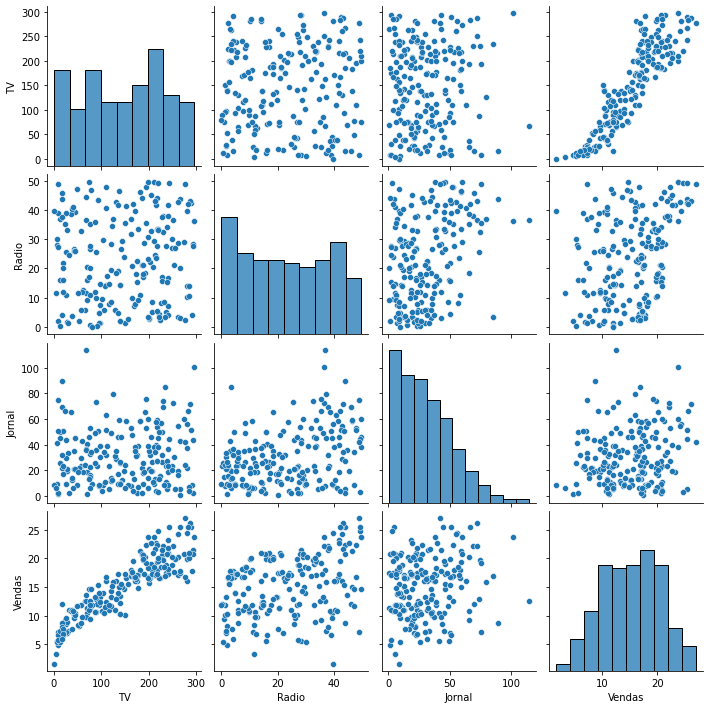

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#CONSTRUIR MAPA DE CALOR
# "corr" = CORRELAÇÃO
#sns.heatmap(tabela.corr(), annot=True)
#plt.show()

sns.pairplot(tabela)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [16]:
#SEPARAR AS INFORMAÇÕES ENTRE DADOS DE TREINO E DADOS DE TESTE PARA APRENDIZAGEM DA IA FAZENDO UMA PREVISÃO

from sklearn.model_selection import train_test_split

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#CRIAR AS INTELIGENCIAS ARTIFICIAIS
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#TREINAR AS INTELIGENCIAS ARTIFICIAIS
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [18]:
# CRIAR AS PREVISÕES

from sklearn import metrics

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# COMPARAR OS MODELOS
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9647125165050014


#### Visualização Gráfica das Previsões

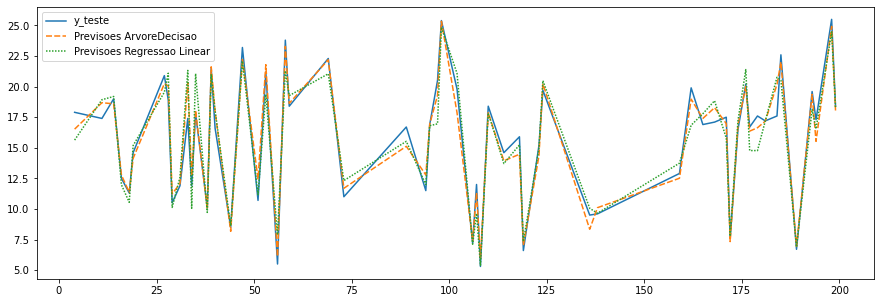

In [19]:
# PAREI NO MINUTO 01:31:16

# CRIAR TABELA VAZIA
tabela_auxiliar = pd.DataFrame()

tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

# MOSTRAR O QUANTO CADA FORMA DE PREVISÃO ACERTA
plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_auxiliar)
plt.show()



#### Qual a importância de cada variável para as vendas?

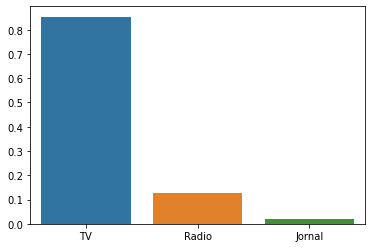

In [20]:
# MOSTRAR QUAL MEIO É MAIS IMPORTANTE PARA AS VENDAS

sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

#### Será que estamos investindo certo?
ACHO Q SIM

In [ ]:
# Siiim